In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
sns.set(rc={'figure.figsize':(11.7,8.27)})

In [3]:
runner = pd.read_csv("../../../output/data_clean/cleaned_runner.csv", index_col=0)
race = pd.read_csv("../../../output/data_clean/cleaned_race.csv", index_col= 0)
runner.age_range = pd.Categorical(
    runner.age_range, categories=['16-25','26-40','40-60','61+','Undefined'],ordered=True
)

In [4]:
#UTMB_runner = runner.loc[np.isin(runner.race_year_id, [72496,39881,25073,17383,11263])]
UTMB_runner = runner.loc[np.isin(runner.race_year_id, [11263])]
UTMB_runner.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1469 entries, 86478 to 87946
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   race_year_id     1469 non-null   int64   
 1   ranking          1469 non-null   float64 
 2   runner           1469 non-null   object  
 3   time             1469 non-null   object  
 4   age              1469 non-null   float64 
 5   gender           1467 non-null   object  
 6   nationality      1469 non-null   object  
 7   time_in_seconds  1469 non-null   float64 
 8   age_range        1469 non-null   category
 9   speed            1469 non-null   float64 
 10  runner_id        1467 non-null   object  
dtypes: category(1), float64(4), int64(1), object(5)
memory usage: 127.9+ KB


<AxesSubplot:xlabel='Comp.2', ylabel='Comp.3'>

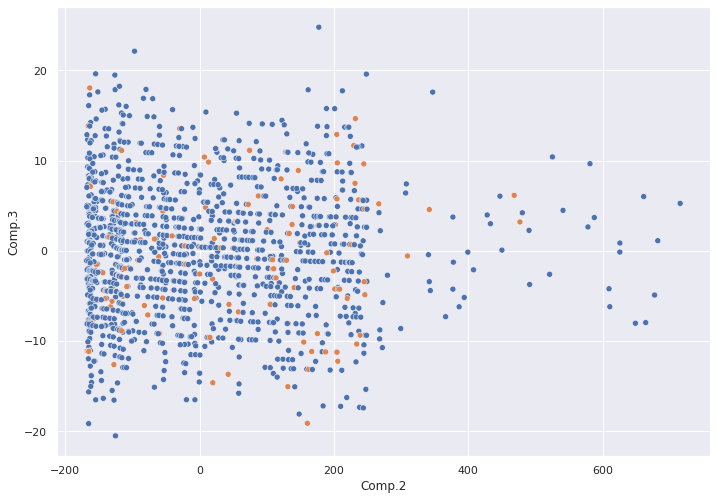

In [9]:
UTMB_runner_qual = UTMB_runner[["ranking", "age", "time_in_seconds", "speed","nationality","gender"]].dropna()
UTMB_runner_quant = UTMB_runner_qual[["age","time_in_seconds","ranking"]]
#UTMB_runner_quant = UTMB_runner_quant.div(UTMB_runner_quant.age, axis=0)
cls = PCA(n_components=3)
pcs = cls.fit_transform(UTMB_runner_quant)

raceDf = pd.DataFrame(pcs, columns=["Comp.1", "Comp.2","Comp.3"])
raceDf.index = UTMB_runner_quant.index
raceDf = raceDf.assign(
    nationality = UTMB_runner_qual.nationality,
    gender = UTMB_runner_qual.gender
)


sns.scatterplot(x = "Comp.2", y = "Comp.3", hue = "", data = raceDf, legend=False)

In [22]:
cls.explained_variance_ratio_

array([9.99534036e-01, 4.60194302e-04])

In [63]:
runner_famd_raw = UTMB_runner[["age","gender","nationality","ranking","time_in_seconds"]].dropna()
runner_famd_raw_data = runner_famd_raw[["age","gender","nationality"]]
import prince
famd = prince.FAMD(
    n_components=2,
    n_iter=10,
    copy=True,
    check_input=True,
    engine='auto',
    random_state=10
)
famd = famd.fit(runner_famd_raw_data)

In [64]:
res = famd.row_coordinates(runner_famd_raw_data)
res = res.rename(columns={0:"Comp1",1:"Comp2"})

<AxesSubplot:xlabel='Comp1', ylabel='Comp2'>

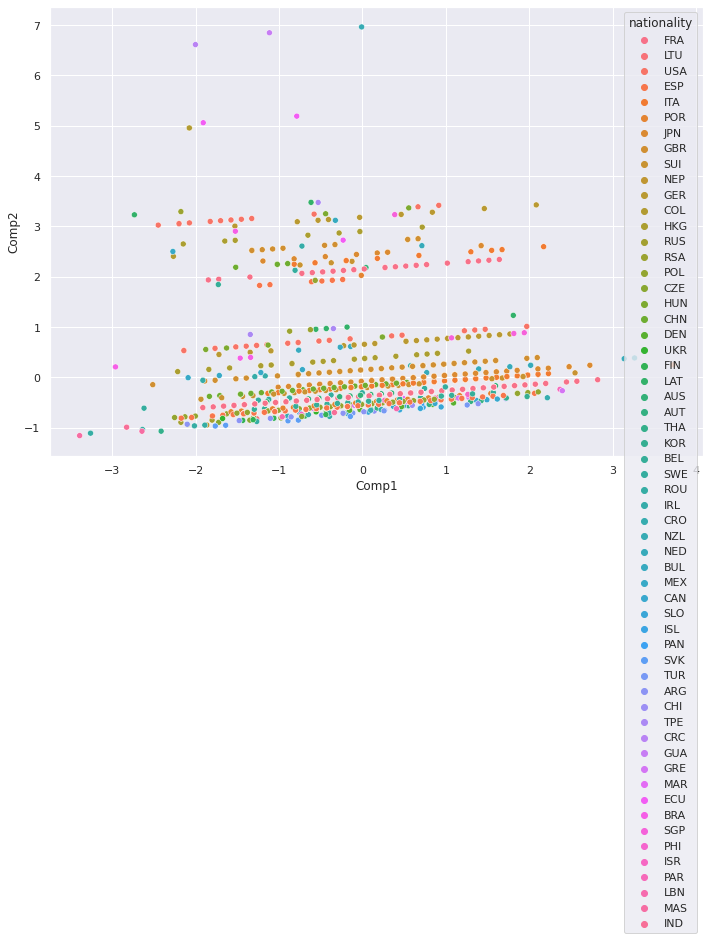

In [71]:
res = res.assign(

)
sns.scatterplot(
    x = "Comp1",
    y = "Comp2",
    hue = runner_famd_raw.nationality,
    data = res
)